# Projeto 1

Nome:*Matheus Augusto Soares*

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
from jupyterthemes import jtplot

#### Pergunta

A importância que o estado demonstra possuir pela industria bélica, possui relação com um IDH de maneira proporcional?

#### Introdução

blabablablablalblbaslblalablkablablbalkbalkalblkablablbalbalbalblablablablbalbalbaklbballablbalbabalbalbalbalbalbalblablablablablbalbalbalbalba

### *Leitura dos dados*

In [3]:
data = pd.read_excel('hdi_human_development_index.xlsx')

In [4]:
importacao = pd.read_excel('arms_imports_us_inflation_adjusted.xlsx')

In [5]:
militar = pd.read_excel('armed_forces_personnel_total.xlsx')

#### Join dos dataframes

In [6]:
data_2010 = data.loc[:, ["geo", 2010]]
importacao_2010 = importacao.loc[:, ["geo", 2010]]
militar_2010 = militar.loc[:, ["geo", 2010]]

In [7]:
data_idx = data_2010.set_index('geo')
importacao_idx = importacao_2010.set_index('geo')
militar_idx = militar_2010.set_index('geo')

In [8]:
df1 = data_idx.join(importacao_idx, how='inner', lsuffix='_IDH', rsuffix='_importacao')

In [9]:
militar_idx = militar_idx.rename(columns={2010: '2010_militares'})
df=df1.join(militar_idx, how="inner")
df.head()

,2010_IDH,2010_importacao,2010_militares
geo,,,
Afghanistan,0.454,377000000.0,307000.0
Albania,0.738,NaN,14700.0
Algeria,0.724,834000000.0,317000.0
Angola,0.495,NaN,117000.0
Argentina,0.816,11000000.0,104000.0


#### Salvando o Dataframe

In [10]:
data.to_csv( 'my_data.csv', index=True)

#### Limpeza

In [11]:
df=df.dropna()
df.head()

,2010_IDH,2010_importacao,2010_militares
geo,,,
Afghanistan,0.454,3.770000e+08,307000.0
Algeria,0.724,8.340000e+08,317000.0
Argentina,0.816,1.100000e+07,104000.0
Armenia,0.729,5.200000e+07,55500.0
Australia,0.927,1.510000e+09,56600.0


### *Análise dos dados*

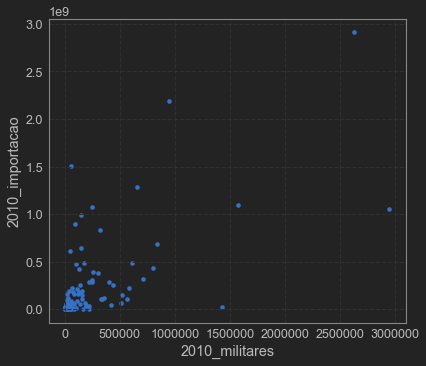

In [41]:
jtplot.style(theme='monokai',gridlines='--')
df.plot.scatter(x= "2010_militares", y ="2010_importacao",color="b")

In [13]:
df_filtrado=df[np.abs(df["2010_importacao"]-df["2010_importacao"].mean()) <= (2*df["2010_importacao"].std())] 
df_filtrado=df[np.abs(df["2010_militares"]-df["2010_militares"].mean()) <= (2*df["2010_militares"].std())]


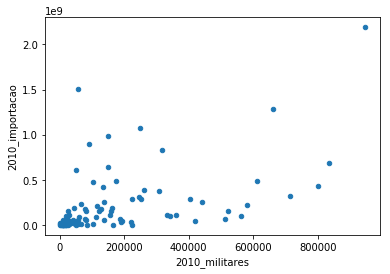

In [14]:
df_filtrado.plot.scatter(x= "2010_militares", y ="2010_importacao")

In [15]:
df.corr(method='pearson', min_periods=1)

,2010_IDH,2010_importacao,2010_militares
2010_IDH,1.000000,0.075185,-0.027248
2010_importacao,0.075185,1.000000,0.651789
2010_militares,-0.027248,0.651789,1.000000
